<a href="https://colab.research.google.com/github/asifahsaan/Code/blob/main/Copy_of_Thesis_2_Statistical_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                                                                                                 Rossman Sales Prediction

Import the libraries

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from pandas import DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
store = pd.read_csv("/content/gdrive/MyDrive/Thesis Data/Dataset/store.csv", low_memory=False)
train = pd.read_csv("/content/gdrive/MyDrive/Thesis Data/Dataset/train.csv/train.csv", low_memory=False,parse_dates = [2])
test = pd.read_csv("/content/gdrive/MyDrive/Thesis Data/Dataset/test.csv/test.csv", low_memory=False, parse_dates = [3])

Check the train data

In [4]:
#train
train.head().append(train.tail())

<ipython-input-4-b5f604c1d540>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train.head().append(train.tail())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
#test
test.head().append(test.tail())

<ipython-input-5-b8ae6ec8dd92>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test.head().append(test.tail())


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [6]:
#store
store.head().append(store.tail())

<ipython-input-6-1b727324f6b6>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store.head().append(store.tail())


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


##**Part 1-Exploratory Data Analysis**

check for NAN values in train , test and store data

In [7]:
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
test[pd.isnull(test.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


Store having NAN values for CompetitionOpenSinceMonth

In [9]:
store[pd.isnull(store.CompetitionOpenSinceMonth)].head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,NaN,NaN,NaN
28,29,d,c,2170.0,NaN,NaN,0,NaN,NaN,NaN
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


Store having NAN for Promo2SinceWeek

In [10]:
NoPW = store[pd.isnull(store.Promo2SinceWeek)]
NoPW[NoPW.Promo2 != 0].shape

(0, 10)

The dataset contains the values f Sales which are 0 due to School or State Holiday.              
Plot the train data having sales greater then 0 for Store1   
It can be seen the sales jumps during end of Decemeber each year

<Axes: title={'center': 'Store1'}, xlabel='Date'>

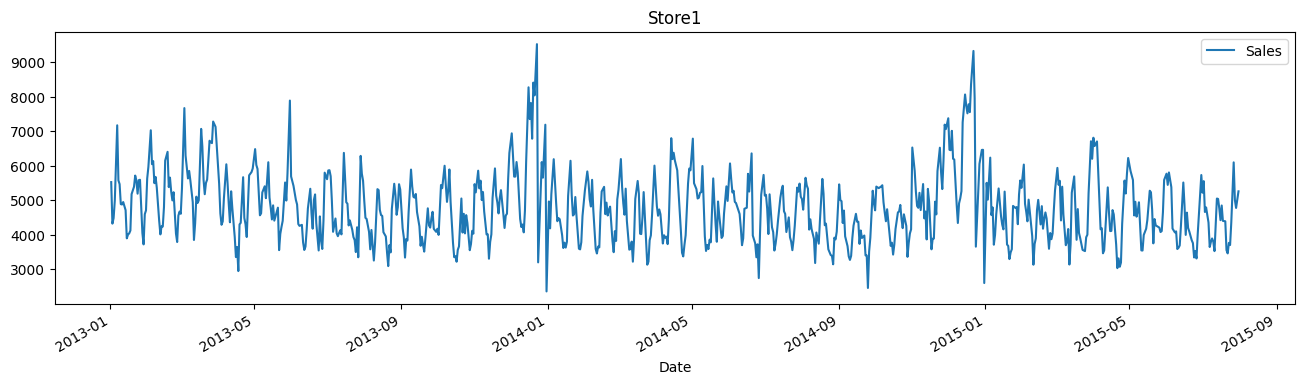

In [11]:
# sales of store1 full timne
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))

Compare the Sles of Store 1 from 1st June 2016 to 31st July 2014 vs 1st August 2014 - 30th Sept 2014

<Axes: title={'center': 'Store1'}, xlabel='Date'>

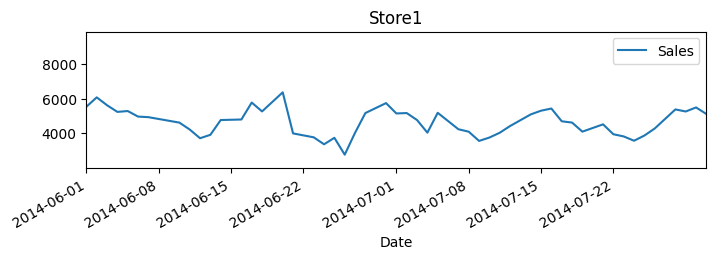

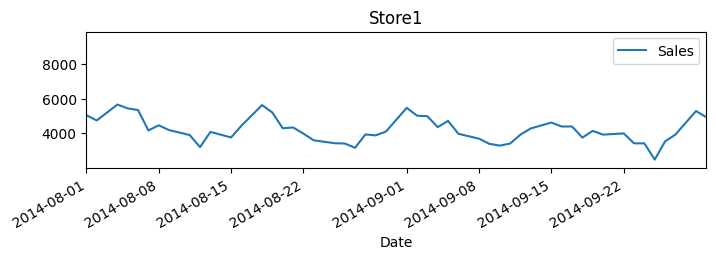

In [12]:
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])

Fill the null values of test datset & Train dataset

In [13]:
# the store should be open in the test,so we fillna with 1
test.fillna(1, inplace=True)

In [14]:
# fillna in store with 0 has better result than median()
store.fillna(0, inplace=True)

We can see all the null values are replaced and now we can moveahead with our analysis

In [15]:
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [16]:
train1 = train

In [17]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
train2 = pd.merge(train1, store, on='Store')    ## for TimeSeries Arima Model
train2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [19]:
df_train_store = pd.merge(train, store, on='Store')   ## for XGBoost model
df_test_store = pd.merge(test, store, on='Store')

## Part 2-Feature Creation / Feature Selection

Merge the training dataset with the Store dataset
Merge the Test dataset with store dataset

In [20]:
train2['Sales/Customer'] = train2['Sales']/train2['Customers']
train2['Sales/Customer'].describe()

df_train_store['Sales/Customer'] = df_train_store['Sales']/df_train_store['Customers']

In [21]:

def features_create(data):
    
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
  
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data

In [22]:
features_create(df_train_store)
features_create(train2)
features_create(df_test_store)
print('Features creation finished')
# train.head()

<ipython-input-21-af5788c4dc27>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
<ipython-input-21-af5788c4dc27>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


Features creation finished


<ipython-input-21-af5788c4dc27>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


We can see that the Customers,promo, Open and Sales/Customers are highly correlated with sales

<Axes: >

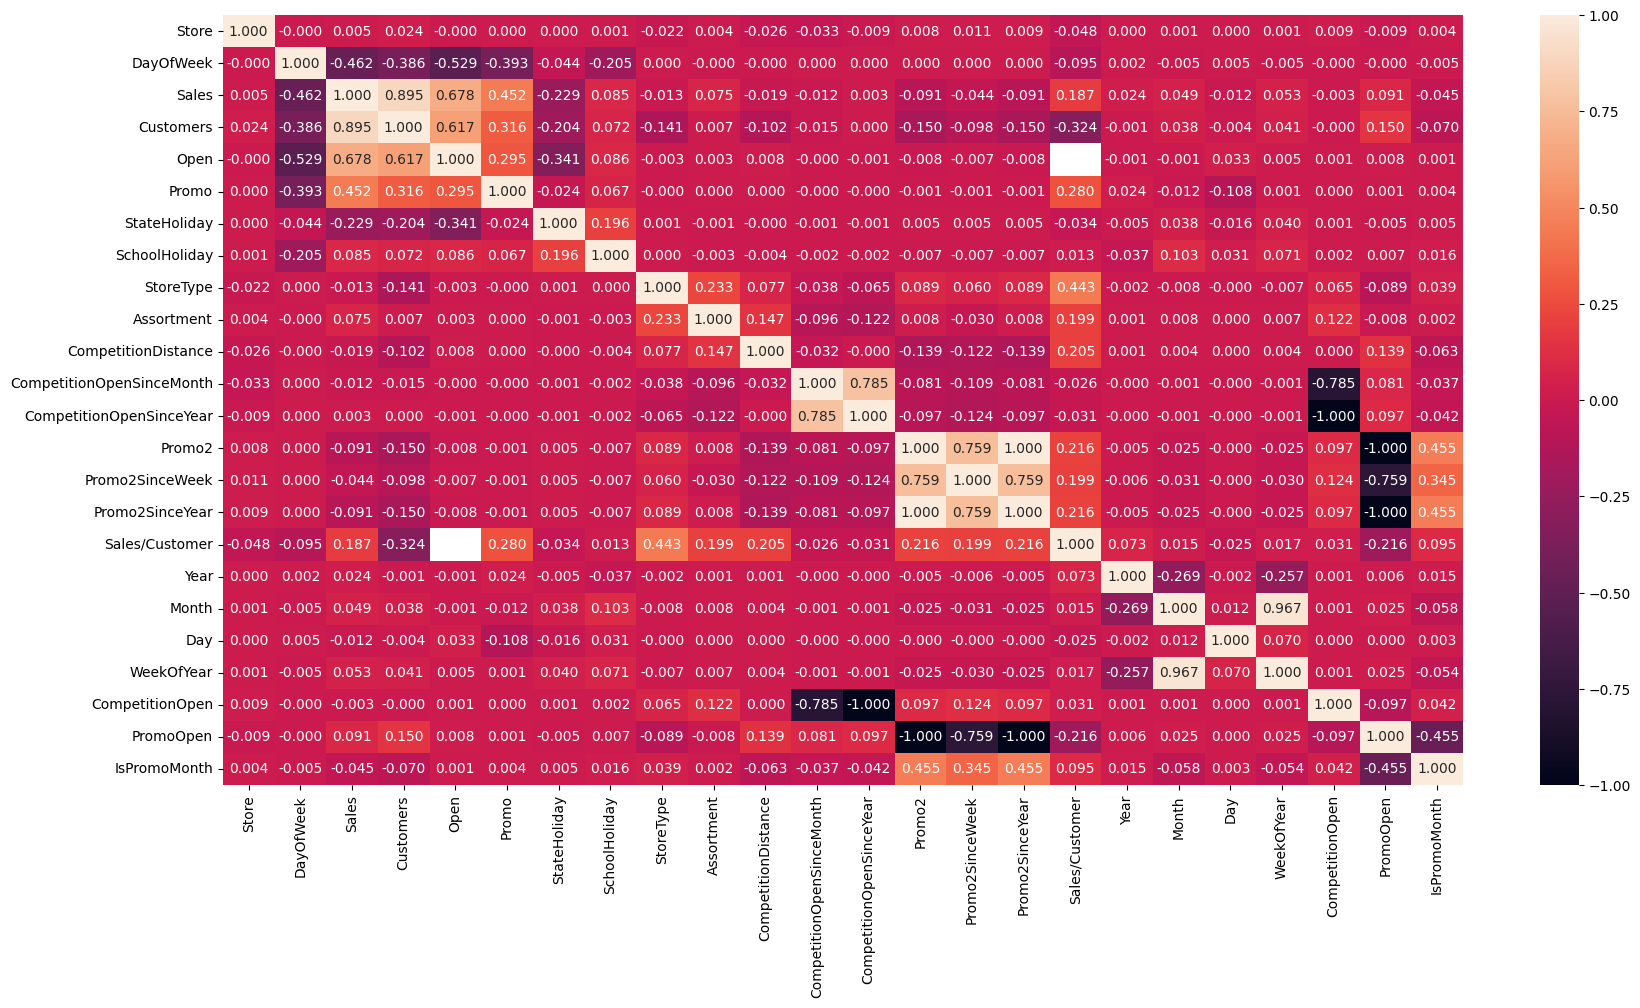

In [23]:
plt.figure(figsize = (20, 10))

sns.heatmap(df_train_store.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.3f')

## Part 3: Statistical Modeling       
Time-Series Analysis per Store Type

In Time Series, the data changes with the time. With an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, for Christmas holidays, which we will see in this dataset.

In [24]:
train2 = train2.set_index('Date')

In [25]:
train2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Sales/Customer,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,3,1,...,,9.482883,2015,7,31,31,82.0,24187.75,Jul,0
2015-07-30,1,3,5020,546,1,1,0,1,3,1,...,,9.194139,2015,7,30,31,82.0,24187.75,Jul,0
2015-07-29,1,2,4782,523,1,1,0,1,3,1,...,,9.143403,2015,7,29,31,82.0,24187.75,Jul,0
2015-07-28,1,1,5011,560,1,1,0,1,3,1,...,,8.948214,2015,7,28,31,82.0,24187.75,Jul,0
2015-07-27,1,0,6102,612,1,1,0,1,3,1,...,,9.970588,2015,7,27,31,82.0,24187.75,Jul,0


For Time Series Anlaysis , we consider one store from each store type a , b , c ,d

In [26]:
train2['Sales'] = train2['Sales'] * 1.0

In [27]:
sales_a = train2[train2.Store == 2]['Sales']
sales_b = train2[train2.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train2[train2.Store == 1]['Sales']
sales_d = train2[train2.Store == 13]['Sales']

Lets plot the sales of each store on Weekly basis

<Axes: xlabel='Date'>

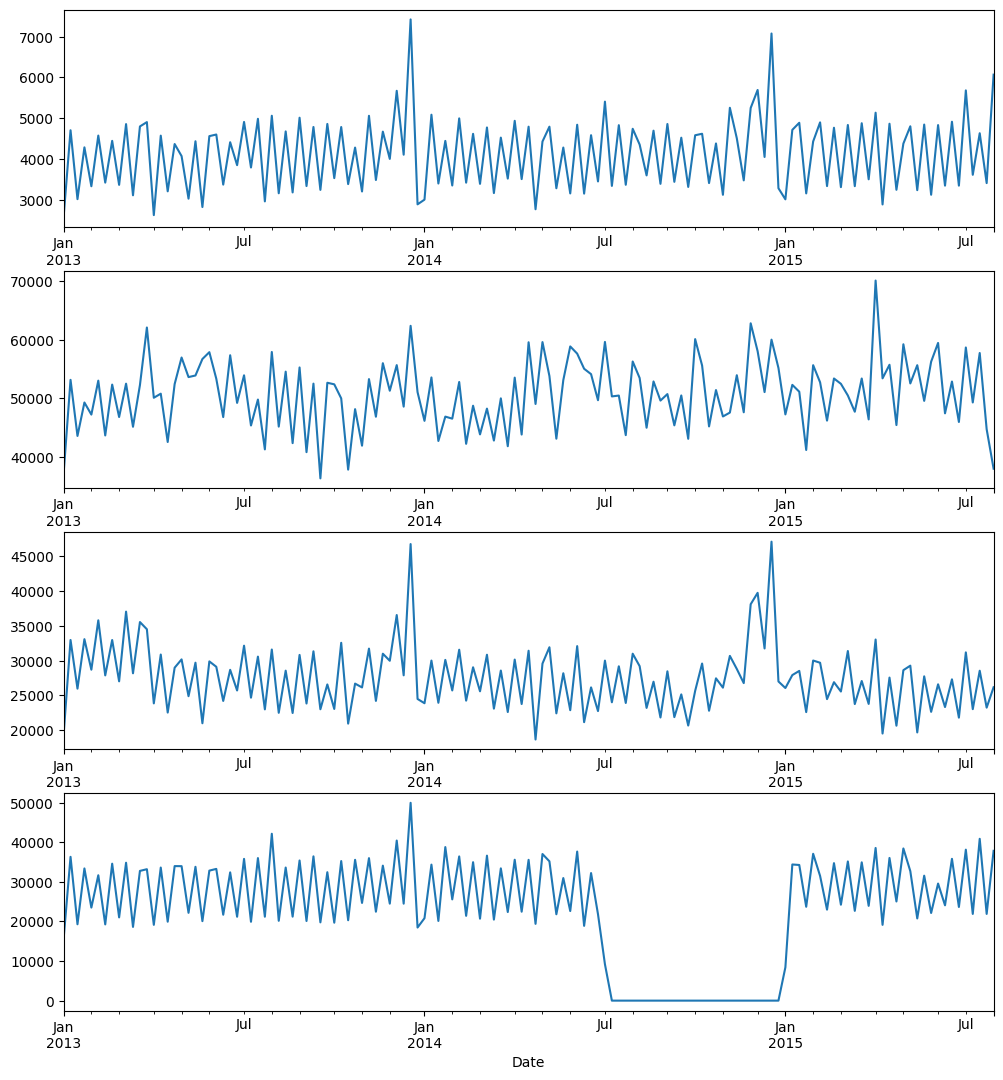

In [28]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').mean().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4)

**Stationarity of Time Series**

Lets check the stationarity through Dicky-Fulller and Rolling window technique:

We check the trend of sales for 1 store from each StoreType nd plot the data on Weekly basis,we can see that the trend is Stationary .i.e ;
Constant mean
Constant Variance,
Covariance changes with time

**Rolling:**
A rolling analysis of a time series model is often used to assess the model's stability over time.
When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time.

The window is rolled on Weekly basis , in which the average is taken on weekly basis Rolling Statistics is a visualization test , where we can compare the original data with the rolled data and check if the data is stationary or not

In [29]:
rollmean = sales_a.rolling(window=7).mean()
rollstd = sales_a.rolling(window=7).std()

The data is resampled on weekly basis and plotted

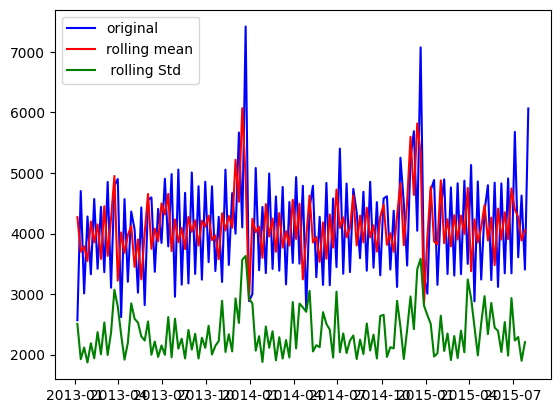

In [30]:
orig = plt.plot(sales_a.resample('W').mean(),color='blue',label='original')
roll_mean = plt.plot(rollmean.resample('W').mean(),color='red',label='rolling mean')
orig_std = plt.plot(rollstd.resample('W').mean(),color='green',label=' rolling Std')
plt.legend(loc='best')
plt.show(block=False)

**Dicky - Fuller test**
It is the test which essentially provides the details whether the Null hypothesis(Data is not stationary) should be rejected against alternate hypothesis(Data is stationary)
It gives the Statistical measures explaining the ADF-Statistics value which should be less than the critical values we accept / reject the null hypothesis based on the p-value
p-value < 0.5 indicates that the null hypothesis should be rejected

Thus from our data it is clear that our data is stationary and doesnot change heavily with time.

**The Akaike information criterion (AIC) :**
It is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

ADF statistics should be less than the critical interval

In [31]:
from statsmodels.tsa.stattools import adfuller
def stationary_check(sales):
  result = adfuller(sales,autolag='AIC')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
	   print(key, value)


In [32]:
stationary_check(sales_a)
stationary_check(sales_b)
stationary_check(sales_c)
stationary_check(sales_d)

ADF Statistic: -6.218237
p-value: 0.000000
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583
ADF Statistic: -5.660918
p-value: 0.000001
Critical Values:
1% -3.437485646962348
5% -2.8646901138095378
10% -2.568447319459459
ADF Statistic: -4.374784
p-value: 0.000329
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583
ADF Statistic: -6.237461
p-value: 0.000000
Critical Values:
1% -3.4392539652094154
5% -2.86546960465041
10% -2.5688625527782327


If the test statistic is less than the critical value, we fail to reject the null hypothesis and we say series is stationary

If Time is Series is not Stationary

In [52]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_timeseries(sales, StoreType):

    fig, axes = plt.subplots(3, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition = seasonal_decompose(sales, model='additive', freq=7)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid

    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left')

    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left')

    axes[2].plot(estimated_residual, 'r', label='Residuals')
    axes[2].legend(loc='upper left')

    plt.title('Decomposition for StoreType')

TypeError: ignored

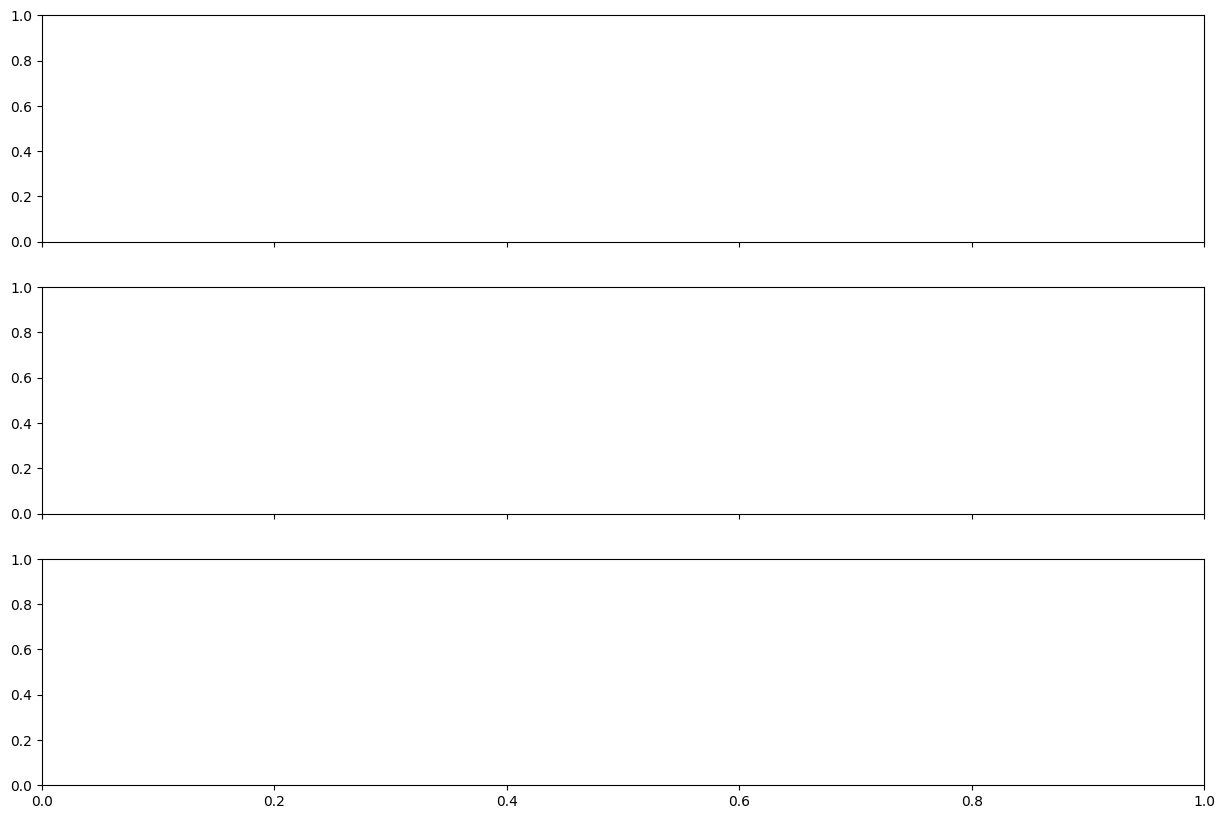

In [53]:
plot_timeseries(sales_a, 'a')

**Autocorrelation :**
Autocorrelation, also known as serial correlation or cross-autocorrelation, is the cross-correlation of a signal with itself at different points in time. It is the correlation between values of the process at different times. Informally, it is the similarity between observations as a function of the time lag between them. It is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise.

The next step in ourtime series analysis is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

**Autocorrelation Function (ACF) :**
ACF is a measure of the correlation between the timeseries with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’tn’ with series at instant ‘t1-5’…’tn-5’ (t1-5 and tn being end points).

**Partial Autocorrelation Function (PACF) :**
PACF measures the correlation between the timeseries with a lagged version of itself but after eliminating the variations explained by the intervening comparisons. Eg. at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [33]:
def auto_corr(sales):
    lag_acf = acf(sales,nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')
  
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('ACF')


    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('PACF')

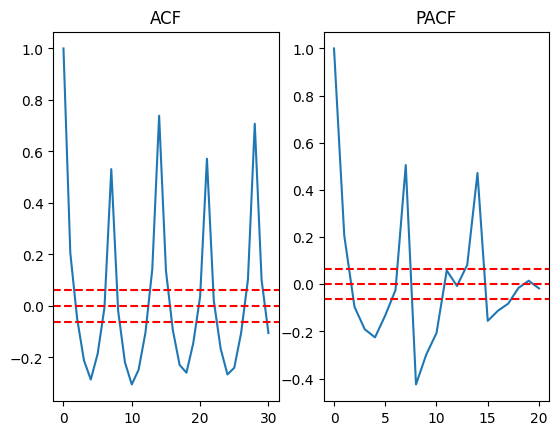

In [34]:
auto_corr(sales_a)

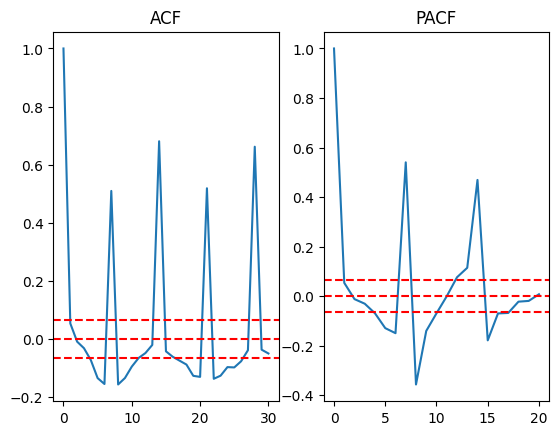

In [35]:
auto_corr(sales_b)

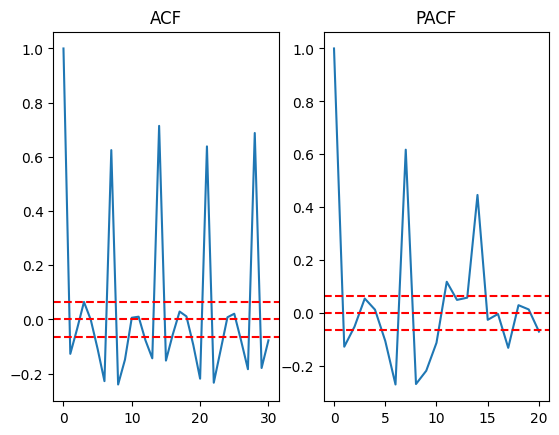

In [36]:
auto_corr(sales_c)

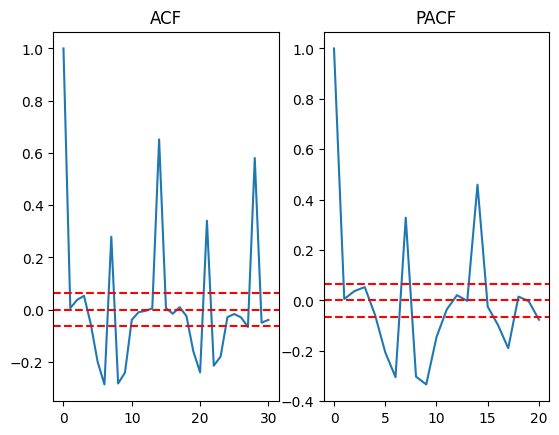

In [37]:
auto_corr(sales_d)

We can calculate P , Q values for our Arima model from the above graphs:

The point where our graph touches 0 for ACF graph is Q ---> 2

The point where our graph touches 0 for PACF graph is P ---> 2

Since th above ACF and PACF plots shows that the values of Q and P should be 2,3 respectively , Lets do a grid search and test the AIC for each model to select the best p , d ,q parametes. The model having lowest AIC determines an accurate performance. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

*Arima Model *(Autoregressive Indegrated Moving Average) determines the forecast of Sales data

We have to decide the p,d,q for the arima model to fit the data to get the proper prediction:

p(Auto Regression) as the name suggests , it determines the effect of previous sales on the current sale.It takes into consideration the effect of previous sale.
It is represented by :
Y_{t} = c + ph1(1)Y_{t-1} + phi_{2}Y_{t-2} + ...... + phi_{p}Y_{t-p} + e_{t}

p =1 ,determines that the effect of previous month has been taken.
ph1 determines the variable (Sales) for which we are lagging sales_value by 1.
Auto Regression model of order 1 i.e. p=1 or ARIMA(1,0,0) is represented by the following regression equation
Y_{t} = c + ph1(1)Y_{t-1}

d = determines the diffrence taken between original series and the lagged series to achieve the stationarity.
d = 0 , determins that the series was already stationary.
d = 1 , determines that the series was subtracted from its lagged series to attain stationary
Auto Regression model of order 1 i.e. d=1 or ARIMA(0,1,0) is represented by the following regression equation
y(t_new) = y(t) - y(t-1)

q(Moving Average) = extract the influence of the previous period’s error terms on the current period’s error
MA model of order 1 i.e. q=1 or ARIMA(0,0,1) is represented by the following regression equation
Y_{t} = c + e_t + theta_{1}e_{t-1}

Δyt=c+ϕ1Δyt−1+θ1ϵt−1+ϵt

In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
def sample(sales):
  return(sales.resample('MS').mean())

In [40]:
y_sale_a = sample(sales_a)
y_sale_b = sample(sales_b)
y_sale_c = sample(sales_c)
y_sale_d = sample(sales_d)

In [41]:
def model(i,sale):
  ex = train2.loc[train2['Store'] == i,['Customers','Promo']]
#   ex = train2.loc[train2['Store'] == i]
#   ex.drop(['Open','PromoInterval','monthStr','Customers'],axis=1,inplace =True)
  y_sales = sale.resample('MS').mean()
  y_ex = ex.resample('MS').mean()
  exog = sm.add_constant(y_ex)
  exog.tail()
  return y_sales , exog

In [42]:
y_sale_model_a , exog_a = model(2,sales_a)
y_sale_model_b , exog_b = model(85,sales_b)
y_sale_model_c , exog_c = model(1,sales_c)
y_sale_model_d , exog_d = model(13,sales_d)

In [43]:
exog_a = exog_a.dropna()
exog_a.isna().sum()

exog_b = exog_b.dropna()
exog_b.isna().sum()

exog_c = exog_c.dropna()
exog_c.isna().sum()

exog_d = exog_d.dropna()
exog_d.isna().sum()

const        0
Customers    0
Promo        0
dtype: int64

Function to define the Arima model for each Store type 
The function will consider the Sales data as well as external factors that are effecting the sales price of the stores.

The order parameter (p,q,d) for each Sales store type is selected after a lot of test and trial

After model training the predictions are performed for the 1st Jan - 2015 to 1st July 2015 of the train data.

The plots are created to check the accuracy of prediction of the actual vs predicted sales values by the model for each store type

In [44]:
def arima(y_sale,exog,or1,sord):
    mod = sm.tsa.statespace.SARIMAX(y_sale,
                                    exog,
                                    order=or1,
                                    seasonal_order=sord,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)



    results = mod.fit(disp=0)
    ## -----------------------predictions-------------------
    pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), end=pd.to_datetime('2015-07-01'), dynamic=False)
    pred_ci = pred.conf_int()

   ##------------------------plot-----------------------------
    ax = y_sale['2013':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                      pred_ci.iloc[:, 1],
                      pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('sales')
    plt.legend()

    plt.show()


    y_forecasted = pred.predicted_mean
    y_truth = y_sale['2015-01-01':'2015-07-01']

   ##-------------Compute the mean square error----------------
    mse = ((y_forecasted - y_truth) ** 2).mean()
    rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
    rmspe =  np.sqrt(np.mean((y_forecasted/y_truth) ** 2))
    return results , mse,rmse,rmspe

Prediction for Sales Store Type A

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


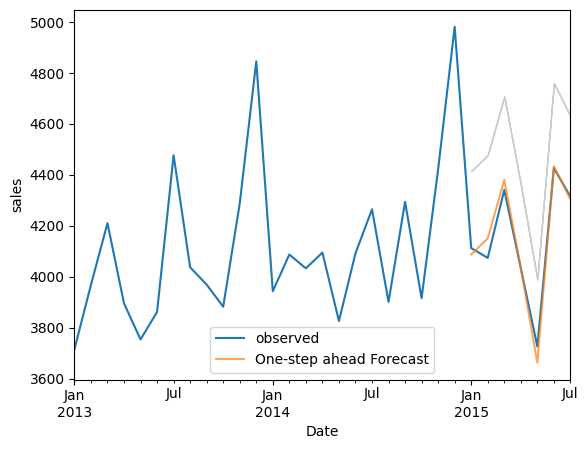

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   31
Model:             SARIMAX(5, 1, 3)x(1, 0, [], 12)   Log Likelihood                 -79.214
Date:                             Wed, 05 Apr 2023   AIC                            184.429
Time:                                     19:51:20   BIC                            191.773
Sample:                                 01-01-2013   HQIC                           182.919
                                      - 07-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019    483.109  -3.88e-06      1.000    -946.878     946.875
Customers      8.9607     4

In [45]:
or_a = (5,1,3)
sord_a=(1, 0, 0, 12)
result_a,mse_a,rmse_a,rmspe_a= arima(y_sale_model_a,exog_a,or_a,sord_a)
print(result_a.summary())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_a, 2)))
print('The Root Squared Error of our forecasts is {}'.format(round(rmse_a, 2)))
print('The Root Squared Per Error of our forecasts is {}'.format(round(rmspe_a, 2)))


Prediction for Sales Store Type B

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


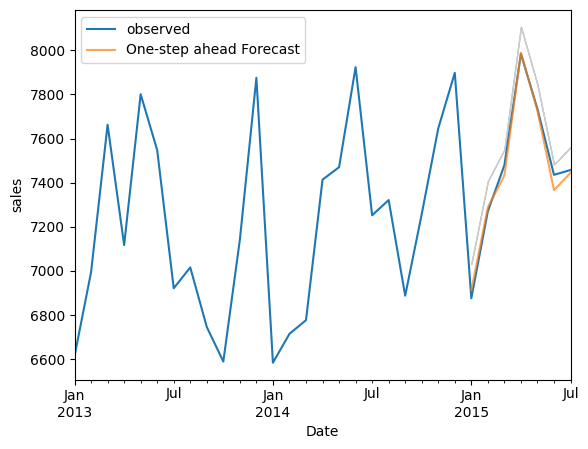

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   31
Model:             SARIMAX(3, 2, 3)x(1, 0, [], 12)   Log Likelihood                 -79.186
Date:                             Wed, 05 Apr 2023   AIC                            180.373
Time:                                     19:51:21   BIC                            187.402
Sample:                                 01-01-2013   HQIC                           179.722
                                      - 07-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201   1.89e+04   1.06e-06      1.000   -3.71e+04    3.71e+04
Customers      7.0233      

In [46]:
or_b = (3,2,3)
sord_b=(1, 0, 0, 12)
result_b,mse_b,rmse_b,rmspe_b= arima(y_sale_model_b,exog_b,or_b,sord_b)
print(result_b.summary())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_b, 2)))
print('The Root Squared Error of our forecasts is {}'.format(round(rmse_b, 2)))
print('The Root Squared Per Error of our forecasts is {}'.format(round(rmspe_b, 2)))

Prediction for Sales Store Type C

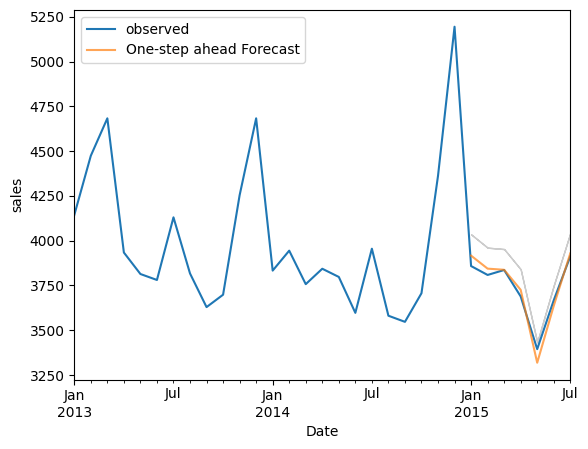

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   31
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood                 -90.316
Date:                             Wed, 05 Apr 2023   AIC                            198.633
Time:                                     19:51:22   BIC                            205.586
Sample:                                 01-01-2013   HQIC                           198.989
                                      - 07-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0977   4316.013  -2.26e-05      1.000   -8459.328    8459.133
Customers      9.2331      

In [47]:
or_c = (2,1,2)
sord_c=(1, 0, 0, 12)
result_c,mse_c,rmse_c,rmspe_c= arima(y_sale_model_c,exog_c,or_c,sord_c)
print(result_c.summary())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_c, 2)))
print('The Root Squared Error of our forecasts is {}'.format(round(rmse_c, 2)))
print('The Root Squared Per Error of our forecasts is {}'.format(round(rmspe_c, 2)))

I tried various combination of p,q,d in SARIMAX model and couldnot achieve  RMPSE less than 1.